 # Análisis exploratorio de datos (EDA) e Ingeniería de caracteristicas (FE)
 ### Variable objetivo: Sobrevivencia

In [1]:
# Se importan los modulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Se lee el dataset de entrenamiento y se guarda en una variable
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Se revisan las estadisticas del dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Se revisa cuantos valores NaN existen en el dataframe
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Análisis en base a la variable nominal género

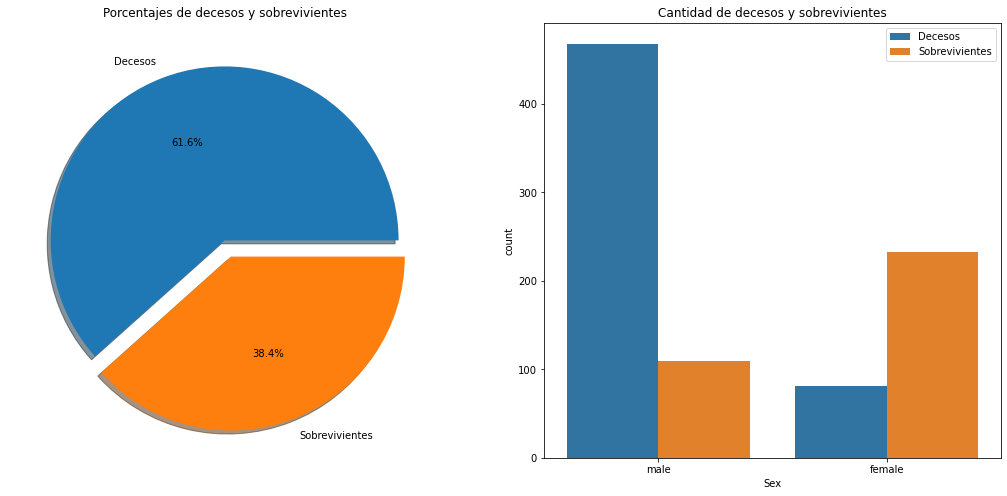

In [5]:
# Se crean dos espacios de figuras vacios para el despliegue de las gráficas
f , ax = plt.subplots(1, 2, figsize=(18, 8))

# A partir del dataframe se crea una serie para posteriormente realizar una gráfica tipo "pie" que muestre los porcentajes de los decesos y sobrevivientes
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], explode=[0, 0.1], shadow=True, labels=['Decesos', 'Sobrevivientes'])

# Se cambian los títulos a la figura posicionada en a[0]
ax[0].set_title('Porcentajes de decesos y sobrevivientes')
ax[0].set_ylabel('')

# Se crea una gráfica de barras en la posición a[1] para mostrar los decesos y sobrevivientes por género
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Cantidad de decesos y sobrevivientes')
ax[1].legend(labels=['Decesos', 'Sobrevivientes'])

# Se plotea todo
plt.show()

In [6]:
# Se crea una tabulación cruzada por género y sobrevivencia.
pd.crosstab(data['Sex'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
Sex,,
female,81,233
male,468,109


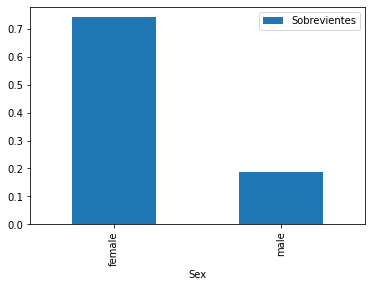

In [7]:
# Se realiza un promedio de las mujeres y los hombres sobrevivientes
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar().legend(labels=['Sobrevientes'])
plt.show()

### Análisis en base a la variable ordinal (Pclass)

In [8]:
# Se crea una tabulación cruzada por clase y sobrevivencia.
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


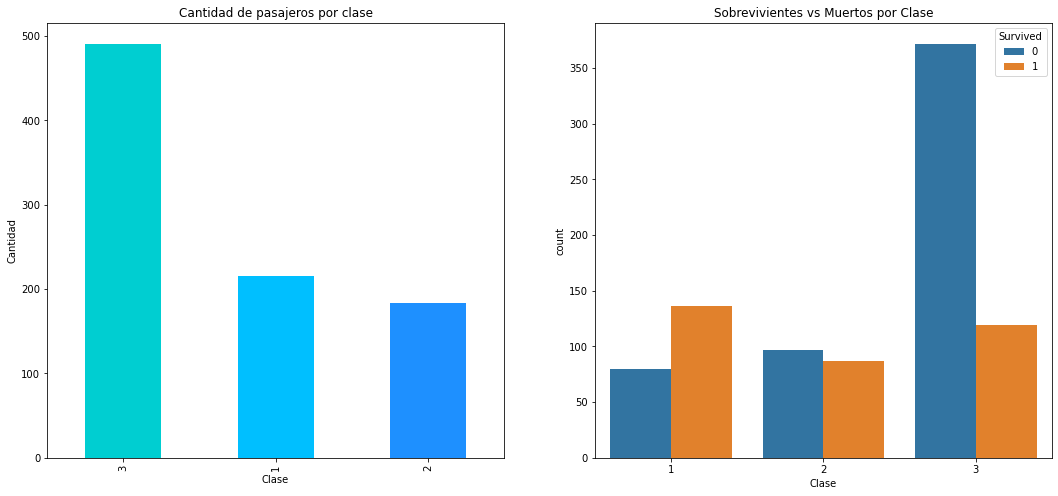

In [9]:
# Se crean dos espacios de figuras vacios para el despliegue de las gráficas
f, ax = plt.subplots(1, 2, figsize=(18,8))

# Se crea una gráfica de barras en la posición a[0] con la cantidad total de pasajeros por clase y se establecen los títulos
data['Pclass'].value_counts().plot.bar(ax=ax[0], color=['#00CED1', '#00BFFF', '#1E90FF'])
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel('Cantidad')
ax[0].set_xlabel('Clase')

# Se crea una gráfica de barras de los decesos y sobrevivientes por clase (donde el azul representan los decensos '0' y el color naranja los sobrevivientes '1' )
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sobrevivientes vs Muertos por Clase')
ax[1].set_xlabel('Clase')

# Se plotea
plt.show()

#### Sobrevivencia vs Género y Clase

In [10]:
# Se crea una tabulación cruzada de la sobrevivencia, el genero y la clase
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

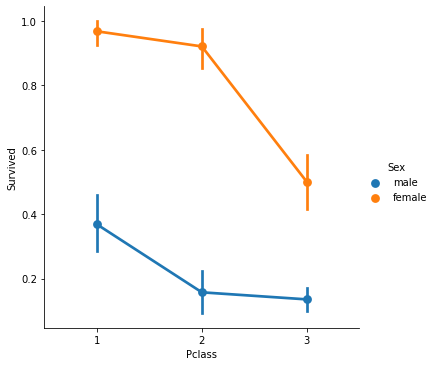

In [11]:
# Se crea una gráfica donde se muestra el porcentaje de sobrevivencia por clase y género usando el módulo de seaborn 
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')

# Se plotea
plt.show()

### Análisis en base a la variable continua (pasaje)

In [12]:
# Se imprimen los precios máximos y mínimos del pasaje 
print("El pasaje mas caro: {}".format(data['Fare'].max()))
print("El pasaje mas barato: {}".format(data['Fare'].min()))

El pasaje mas caro: 512.3292
El pasaje mas barato: 0.0


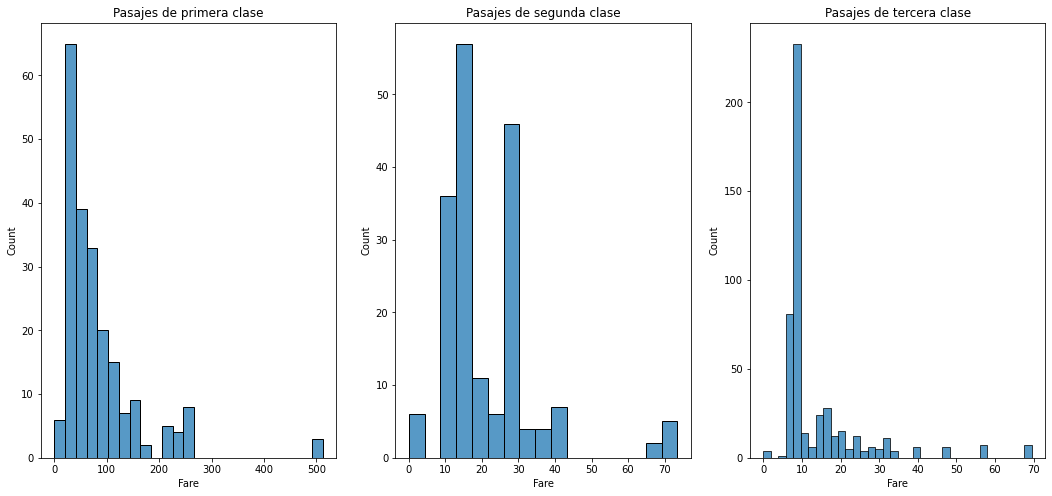

In [13]:
# Se crean 3 espacios de figuras vacios para el despliegue de las gráficas (1 fila y 3 columnas)
f, ax = plt.subplots(1, 3, figsize=(18,8))

# Se crea un histograma del precio del boleto filtrando el dataset por la clase 1
sns.histplot(data[data['Pclass'] == 1]['Fare'], ax=ax[0])
ax[0].set_title('Pasajes de primera clase')

# Se crea un histograma del precio del boleto filtrando el dataset por la clase 2
sns.histplot(data[data['Pclass'] == 2]['Fare'], ax=ax[1])
ax[1].set_title('Pasajes de segunda clase')

# Se crea un histograma del precio del boleto filtrando el dataset por la clase 3
sns.histplot(data[data['Pclass'] == 3]['Fare'], ax=ax[2])
ax[2].set_title('Pasajes de tercera clase')

# Se plotea
plt.show()

## Ingeniería de Características

In [14]:
# Se crea una nueva característica ('Age_range') a partir de 'Age'. Las edades son clasificadas dependiendo los siguientes criterios: 
data['Age_range'] = 0
data.loc[data['Age'] <= 16, 'Age_range'] = 0
data.loc[(data['Age'] >16) & (data['Age'] <= 32), 'Age_range'] = 1
data.loc[(data['Age'] >32) & (data['Age'] <= 48), 'Age_range'] = 2
data.loc[(data['Age'] >48) & (data['Age'] <= 64), 'Age_range'] = 3
data.loc[data['Age'] > 64, 'Age_range'] = 4

In [15]:
# Se muestran 10 filas aleatorias del dataset
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,0
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C,2
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0000,NaN,S,1
780,781,1,3,"Ayoub, Miss. Banoura",female,13.00,0,0,2687,7.2292,NaN,C,0
543,544,1,2,"Beane, Mr. Edward",male,32.00,1,0,2908,26.0000,NaN,S,1
373,374,0,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,1
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S,2
499,500,0,3,"Svensson, Mr. Olof",male,24.00,0,0,350035,7.7958,NaN,S,1


In [16]:
# Se muestra el número de pasajeros en cada rango de edad segun la clasificación realizada previamente
data['Age_range'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_range
1,346
0,277
2,188
3,69
4,11


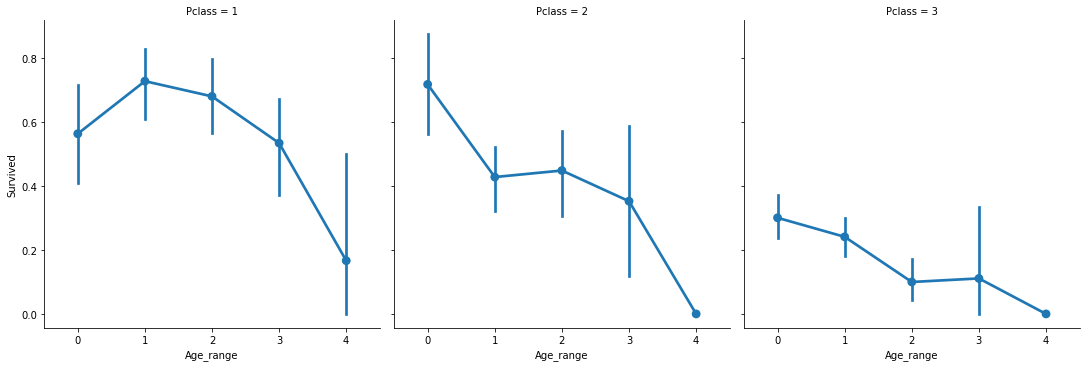

In [17]:
# Se crean 3 gráficas donde se muestra el porcentaje de sobrevivencia por clae y rango de edad
sns.catplot(x='Age_range', y='Survived', data=data, col='Pclass', kind='point')

# Se plotea
plt.show()

In [18]:
# Se crea una nueva característica ('Fare_range') a partir de 'Fare' usando la función qcut para dividir en 4 rangos. 
data['Fare_range'] = pd.qcut(data['Fare'], 4)

In [19]:
# Se agrupan los rangos para conocer sus valores
data.groupby(['Fare_range'])['PassengerId'].count().to_frame().style.background_gradient(cmap='summer_r')

,PassengerId
Fare_range,
"(-0.001, 7.91]",223
"(7.91, 14.454]",224
"(14.454, 31.0]",222
"(31.0, 512.329]",222


In [20]:
# Se crea una nueva caracteriística 'Fare_category' y los rangos de los precios del pasaje son clasificados y almacenados en la nueva característica dependiendo los siguientes criterios:
data['Fare_category'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_category'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_category'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare_category'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <= 512.329), 'Fare_category'] = 3

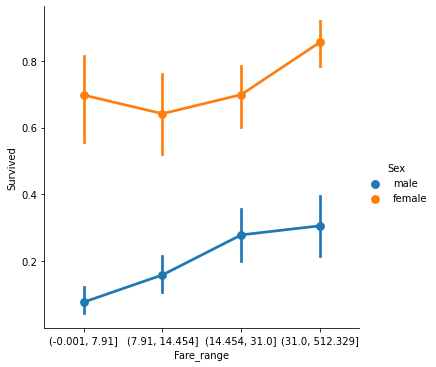

In [21]:
# Se crea una gráfica donde se muestra el porcentaje de sobrevivencia por rango de precio del boleto y género usando el módulo de seaborn 
sns.catplot(x='Fare_range', y='Survived', data=data, hue='Sex', kind='point')

# Se plotea
plt.show()

In [22]:
# Los valors Strings se reemplazan por valores numéricos
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,2,"(7.91, 14.454]",1


In [24]:
# Se eliminan las características innecesarias así como las que no se pueden clasificar. PassengerId no es eliminado debido a que se requiere como requisito en la submition de Kaggle.
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_range'], axis=1, inplace=True)

In [25]:
# Se establece la columna PassengerId como índice.
data.set_index('PassengerId', inplace=True)

In [26]:
# Se muestra parte del dataset
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_range,Fare_category
PassengerId,,,,,,,,
1,0,3,0,1,0,0.0,1,0
2,1,1,1,1,0,1.0,2,3
3,1,3,1,0,0,0.0,1,1
4,1,1,1,1,0,0.0,2,3
5,0,3,0,0,0,0.0,2,1


In [27]:
# Se muestran los valores NaN existentes
data.isna().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         2
Age_range        0
Fare_category    0
dtype: int64

In [28]:
# Se muestran los valores NaN en la característica 'Embarked'
data[data['Embarked'].isna()]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_range,Fare_category
PassengerId,,,,,,,,
62,1,1,1,0,0,NaN,2,3
830,1,1,1,0,0,NaN,3,3


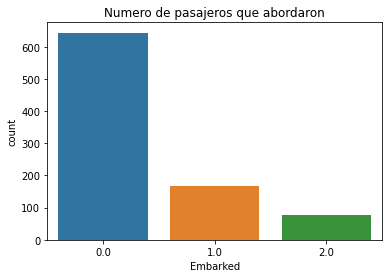

In [29]:
# Se crea una gráfica del total de pasajeros por puerta de embarque 
sns.countplot(x='Embarked', data=data).set_title("Numero de pasajeros que abordaron")

# Se plotea
plt.show()

In [30]:
# Se reemplazan los valores NaN deduciendo por 0 (deduciendo que la mayoria de las personas entraron por esa puerta)
data['Embarked'].fillna(0, inplace=True)

In [31]:
# Se guarda el nuevo dataset.
data.to_csv('data/clean_train.csv')

#### Test Dataset

In [32]:
# Se lee el dataset de prueba y se guarda en una variable
data_test = pd.read_csv('data/test.csv')

In [33]:
# Se revisan los valores NaN existentes
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
# Se crea una nueva característica ('Age_range') a partir de 'Age'. Las edades son clasificadas dependiendo los siguientes criterios: 
data_test['Age_range'] = 0
data_test.loc[data_test['Age'] <= 16, 'Age_range'] = 0
data_test.loc[(data_test['Age'] >16) & (data_test['Age'] <= 32), 'Age_range'] = 1
data_test.loc[(data_test['Age'] >32) & (data_test['Age'] <= 48), 'Age_range'] = 2
data_test.loc[(data_test['Age'] >48) & (data_test['Age'] <= 64), 'Age_range'] = 3
data_test.loc[data_test['Age'] > 64, 'Age_range'] = 4

In [35]:
# Se muestran 10 filas aleatorias del dataset
data_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
208,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C,2
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
393,1285,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S,2
183,1075,3,"Lane, Mr. Patrick",male,NaN,0,0,7935,7.7500,NaN,Q,0
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S,0
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C,1
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,3
186,1078,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,1
337,1229,3,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,NaN,C,2


In [36]:
# Se muestra el número de pasajeros en cada rango de edad segun la clasificación realizada previamente
data_test['Age_range'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_range
1,178
0,120
2,81
3,37
4,2


In [37]:
# Se crea una nueva característica ('Fare_range') a partir de 'Fare' usando la función qcut para dividir en 4 rangos. 
data_test['Fare_range'] = pd.qcut(data_test['Fare'], 4)

In [38]:
# Se agrupan los rangos para conocer sus valores
data_test.groupby(['Fare_range'])['PassengerId'].count().to_frame().style.background_gradient(cmap='summer_r')

,PassengerId
Fare_range,
"(-0.001, 7.896]",114
"(7.896, 14.454]",96
"(14.454, 31.5]",105
"(31.5, 512.329]",102


In [39]:
# Se crea una nueva caracteriística 'Fare_category' y los rangos de los precios del pasaje son clasificados y almacenados en la nueva característica dependiendo los siguientes criterios:
data_test['Fare_category'] = 0
data_test.loc[data_test['Fare'] <= 7.896, 'Fare_category'] = 0
data_test.loc[(data_test['Fare'] > 7.896) & (data_test['Fare'] <= 14.454), 'Fare_category'] = 1
data_test.loc[(data_test['Fare'] > 14.454) & (data_test['Fare'] <= 31.5), 'Fare_category'] = 2
data_test.loc[(data_test['Fare'] > 31.5) & (data_test['Fare'] <= 512.329), 'Fare_category'] = 3

In [40]:
# Los valors Strings se reemplazan por valores numéricos
data_test['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data_test['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [41]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range,Fare_category
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,2,"(-0.001, 7.896]",0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,"(-0.001, 7.896]",0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,3,"(7.896, 14.454]",1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1,"(7.896, 14.454]",1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1,"(7.896, 14.454]",1


In [42]:
# Se eliminan las características innecesarias así como las que no se pueden clasificar. PassengerId no es eliminado debido a que se requiere como requisito en la submition de Kaggle.
data_test.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_range'], axis=1, inplace=True)

In [43]:
# Se establece la columna PassengerId como índice.
data_test.set_index('PassengerId', inplace=True)

In [44]:
# Se muestra parte del dataset
data_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_range,Fare_category
PassengerId,,,,,,,
892,3,0,0,0,2,2,0
893,3,1,1,0,0,2,0
894,2,0,0,0,2,3,1
895,3,0,0,0,0,1,1
896,3,1,1,1,0,1,1


In [45]:
# Se muestran los valores NaN existentes
data_test.isna().sum()

Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
Age_range        0
Fare_category    0
dtype: int64

In [46]:
# Se guarda el nuevo dataset.
data_test.to_csv('data/clean_test.csv')

## Conclusión
Con base al análisis exploratorio de datos y la ingeniería de características se puede observar muy claramente que unos de los factores principales que más impactó en la sobreviviencia
de la catástrofe del titanic fue el "Género", lo cual se puede obervar facilmente desde las primeras gráficas. Sin embargo, no sólo el género fue la carácteristica que más impactó en la sobrevivencia del titanic ya que, dependiendo de la clase en la que viajaba el pasajero así como también el rango de edad fueron unos de los factores clave en la sobrevivencia de la catástrofe del titanic.